<img src="logo.jpg" />

## [Pedram Jahangiry](https://github.com/PJalgotrader) 

# Logistic Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions

In [24]:
rand_state= 1000

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [6]:
df.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


## Data preprocessing 

In [7]:
df.isna().sum()  

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.drop('User ID',axis=1, inplace=True)

In [9]:
df = pd.get_dummies(df, drop_first=True)

The following step is very important for **Classification**.

In general we need to rescale our variables. If we don't rescale the salary in this example, then the model will always return T or F. We have two options now:

1. Rescale the entire data set using StandardScaler
2. Rescale the variables individually (What I will do for this example). 

It is recommended that we use the first method, however, we will lose interpretability of some variables like gender. 

In [10]:
# Let's report the estimated salary in thousand dollars!
df['EstimatedSalary']=df['EstimatedSalary'].apply(lambda x: x/1000)

In [11]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [12]:
df = df[['Purchased','Age', 'EstimatedSalary', 'Gender_Male']]

In [13]:
df.head()

,Purchased,Age,EstimatedSalary,Gender_Male
0,0,19,19.0,1
1,0,35,20.0,1
2,0,26,43.0,0
3,0,27,57.0,0
4,0,19,76.0,1


## Data visualization 

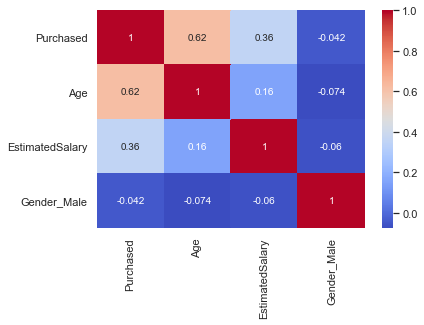

In [14]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

C:\Users\Pedram\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Pedram\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


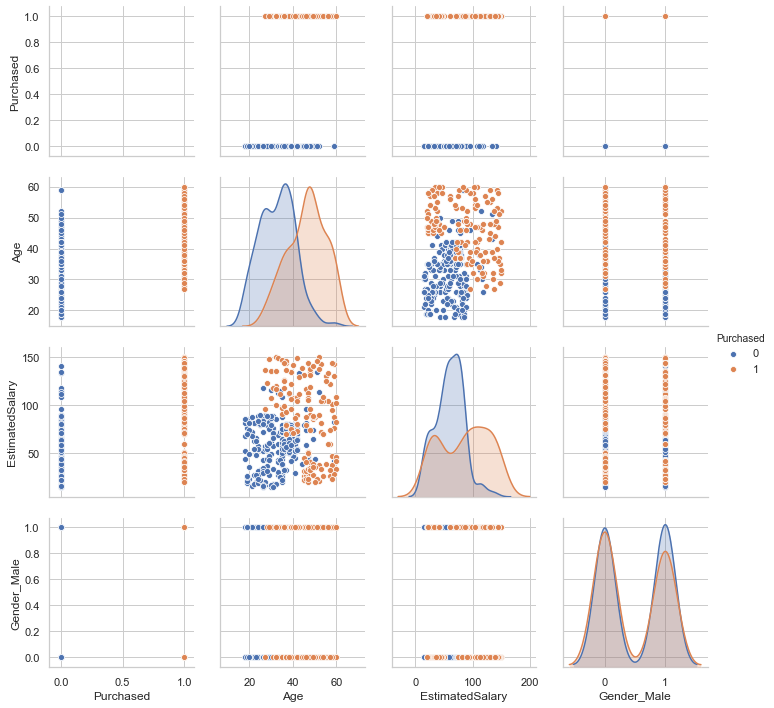

In [15]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Purchased')

### Defining the variables and splitting the data

In [25]:
y = df['Purchased']
X = df.drop('Purchased', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [26]:
X_train.head()

,Age,EstimatedSalary,Gender_Male
269,40,61.0,1
389,48,35.0,0
232,40,107.0,1
89,35,50.0,1
236,40,57.0,1


In [27]:
y_train.head()

269    0
389    1
232    1
89     0
236    0
Name: Purchased, dtype: int64

###  Logistic regressions with Sklearn

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# Fitting Logistic Regression to the Training set

logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# Predicting the Test set results
y_pred_test = logistic.predict(X_test)

### the Confusion Matrix 

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
print(confusion_matrix(y_test, y_pred_test))

[[45  3]
 [11 21]]


In [35]:
# defining our own confusion matrix function
from sklearn.metrics import confusion_matrix
def my_confusion_matrix(y, y_hat):
    cm = confusion_matrix(y, y_hat)
    TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    accuracy = round((TP+TN) / (TP+ FP+ FN+ TN) ,2)
    precision = round( TP / (TP+FP),2)
    recall = round( TP / (TP+FN),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : 0 ','Actual : 1'], columns=['Predict : 0','Predict :1 '])
    print('\n')
    print('Accuracy = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall = {}'.format(recall))
    print("-----------------------------------------")
    return cm_labled
 

In [37]:
my_confusion_matrix(y_test,y_pred_test)



Accuracy = 0.82
Precision = 0.88
Recall = 0.66
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,45,3
Actual : 1,11,21


###  Cross validation

Now let's try to get an estimate for the accuracy of our model using cross validation technique. 

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
# remember we saved our model in an object called "logistic"
accuracy = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 10 , scoring="accuracy" )

# How do you fix the warning? 

In [40]:
accuracy

array([0.87878788, 0.8125    , 0.96875   , 0.8125    , 0.78125   ,
       0.84375   , 0.90625   , 0.71875   , 0.875     , 0.87096774])

In [41]:
round(accuracy.mean(),2)

0.85

In [42]:
round(accuracy.std(),2)

0.07

### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!). We have to rerun the whole model with 2 explanatory variables

In [43]:
X= df[['Age', 'EstimatedSalary']]
y= df[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [45]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X_train, y_train.values.reshape(-1,))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Predicting the Test set results
y_pred = logistic.predict(X_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


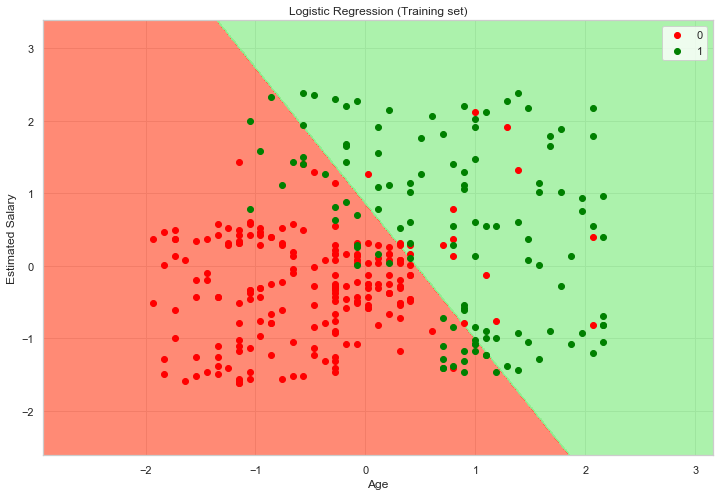

In [47]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


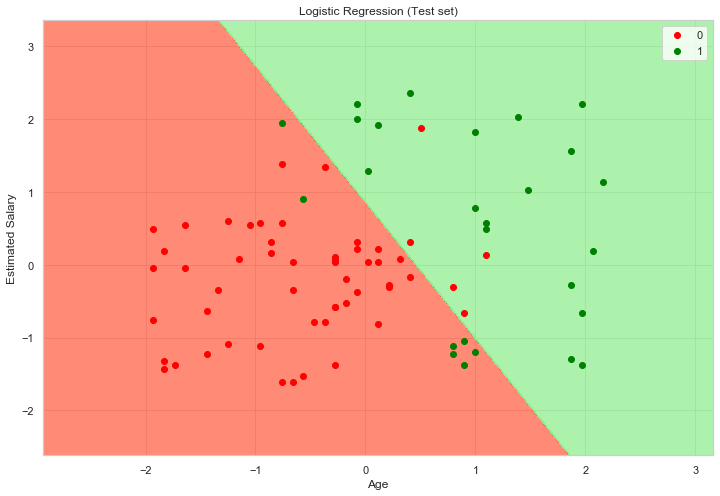

In [48]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [52]:
19/26


0.7307692307692307

In [49]:
print(confusion_matrix(y_test, y_pred))

[[49  5]
 [ 7 19]]


In [53]:
# Accuracy: what percentage of the total dots did we predict correctly?
# precision: among the ones that we predicted positive (green area), how many are actually green dots (incorporating FP: type I error)
# recall: how many of the Green dots (True positives) we predicted correctly (incorporating FN: type II error)
my_confusion_matrix(y_test,y_pred)



Accuracy = 0.85
Precision = 0.79
Recall = 0.73
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,49,5
Actual : 1,7,19


## More reports

In [65]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_fscore_support, precision_recall_curve

In [66]:
# for example, let's take a look at classification_report
# for more information, read additional links number 2, and 3.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        54
           1       0.79      0.73      0.76        26

    accuracy                           0.85        80
   macro avg       0.83      0.82      0.83        80
weighted avg       0.85      0.85      0.85        80



###  Additional links:
1. Why logistic regression is a linear classifier: https://homes.cs.washington.edu/~marcotcr/blog/linear-classifiers/
2. Performance measures (1): https://en.wikipedia.org/wiki/Confusion_matrix
3. Performance measures (2): https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/ 
4. ROC curve: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html